In [60]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import math
%matplotlib inline
sns.set()

#### Generating artificial data using multivariate Gaussian distributions. For 2 features and 3 classes.

In [49]:

# Artificial data for 2 features and 3 classes

X1 = np.random.multivariate_normal(np.array([0,3]),np.array([[1,0],[0,1]]),200).reshape(200,2)
y1 = np.ones(200).reshape(200,1)

X2 = np.random.multivariate_normal(np.array([4,6]),np.array([[1,0],[0,1]]),200).reshape(200,2)
#X2 = [x + [2] for x in list(X2)]
y2 = np.ones(200).reshape(200,1)*2

X3 = np.random.multivariate_normal(np.array([0,8]),np.array([[1,0],[0,1]]),200).reshape(200,2)
#X3 = [x + [3] for x in list(X3)]
y3 = np.ones(200).reshape(200,1)*3

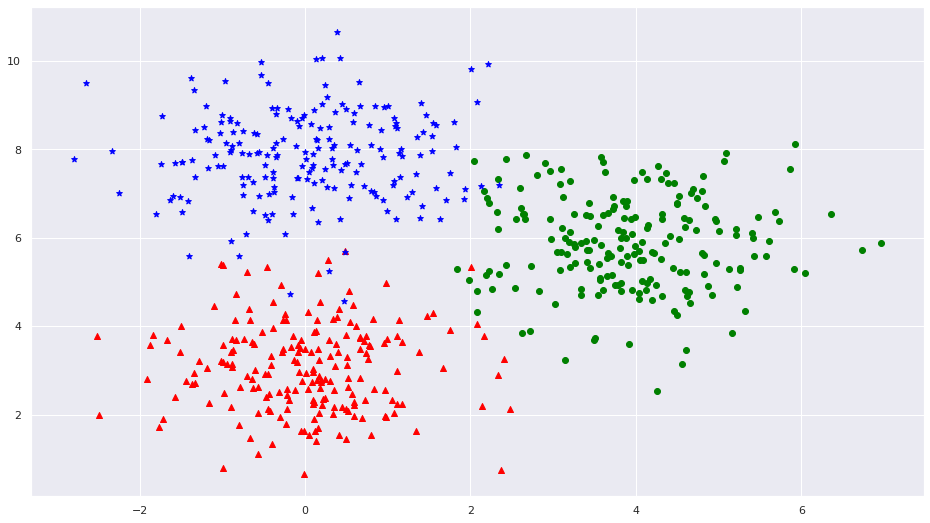

In [51]:
fig = plt.figure(figsize=(16,9))
#ax = plt.axes(projection='3d')
#ax.scatter(full_dataset[:,0],full_dataset[:,1], c=full_dataset[:,2], cmap='viridis', linewidth=0.5);
plt.scatter(list(X1[:,0]), list(X1[:,1]), marker='^',color='red')
plt.scatter(list(X2[:,0]), list(X2[:,1]), marker='o',color='green')
plt.scatter(list(X3[:,0]), list(X3[:,1]), marker='*',color='blue')
#plt.scatter(list(X4[:,0]), list(X4[:,1]), marker='+',color='blue')
plt.show()

#### Segregating the generated data into training and test datasets (80% and 20%, respectively)

In [52]:
# Split the data into training/testing sets


X_train = np.append(X1[:-40],X2[:-40],axis=0)
X_train = np.append(X_train,X3[:-40],axis=0)

X_test = np.append(X1[-40:],X2[-40:],axis=0)
X_test = np.append(X_test,X3[-40:],axis=0)


y_train = np.append(y1[:-40],y2[:-40],axis=0)
y_train = np.append(y_train,y3[:-40],axis=0)


y_test = np.append(y1[-40:],y2[-40:],axis=0)
y_test = np.append(y_test,y3[-40:],axis=0)


In [53]:
print(len(X_train)," ",len(X_test))
print(len(y_train)," ",len(y_test))

480   120
480   120


#### Defining our own function for finding the Euclidean distance between training examples and an test example

$$ d(x^{(i)},x^{(j)}) = \sqrt{\sum_{p=1}^{D} (x_{p}^{(i)}  - x_{p}^{(j)})^2} $$


#### Also, sorting the distances in ascending order and extracting the class information of the k closest examples in the same function

In [75]:
# Computing the euclidean distance and then assigning the most relevant class to the example

def predict_class(
   point_x,                # for the new point's x coordinate
   point_y,                # for the new point's y coordinate
   x_training_dataset,     # contains the training dataset for x values
   y_training_dataset,     # contains the training dataset for y values
   k_val):
    
    # distance between training examples and test example
    distance_class = []
    for item,class_item in zip(x_training_dataset,y_training_dataset):
        x_item = item[0]
        y_item = item[1]
        #print(x_item," ",y_item)
        #print(class_item)
        dist = math.sqrt((math.pow((point_x - x_item),2) + math.pow((point_y - y_item),2)))
        distance_class.append([dist,class_item])
    distance_class.sort()
    get_info = distance_class[:k_val]
    class_val = []
    for item in get_info:
        # get the class values
        class_val.append(int(item[1]))
    return class_val

 #### Assigning the test example to the class with the highest number of occurrences in k nearest examples

In [77]:
class_val = predict_class(X_test[0][0],X_test[0][1],X_train,y_train,k_val=5)
#X_test[0][0]

# assign the most frequent class to the class for maximum value
max(set(class_val), key = class_val.count)

1

#### Trying different values of k and computing the accuracy of the model using the test dataset

#### for K = 1

In [87]:
# iterating over all the test examples and then computing the accuracy of the model
# Accuracy = No. of correct predictions/ total number of predictions

acc_metrics = []
for k in range(1,40):
    cor_pred = 0
    for item1,item2 in zip(X_test,y_test):
        #print(item1,item2)
        class_val = predict_class(item1[0],item1[1],X_train,y_train,k_val=k)
        class_got = max(set(class_val), key = class_val.count)
        if class_got == int(item2):
            cor_pred += 1
        else:
            print("Wrong class predicted = ",class_got," instead of = ",int(item2))
    accuracy = cor_pred/len(X_test)
    print("K = ",k)
    print("Accuracy = ",accuracy)
    acc_metrics.append([k,accuracy])

Wrong class predicted =  3  instead of =  1
Wrong class predicted =  3  instead of =  1
Wrong class predicted =  3  instead of =  1
Wrong class predicted =  3  instead of =  1
Wrong class predicted =  3  instead of =  2
Wrong class predicted =  1  instead of =  3
Wrong class predicted =  1  instead of =  3
K =  1
Accuracy =  0.9416666666666667
Wrong class predicted =  1  instead of =  2
Wrong class predicted =  1  instead of =  3
Wrong class predicted =  2  instead of =  3
Wrong class predicted =  1  instead of =  3
K =  2
Accuracy =  0.9666666666666667
Wrong class predicted =  1  instead of =  2
Wrong class predicted =  1  instead of =  3
K =  3
Accuracy =  0.9833333333333333
Wrong class predicted =  1  instead of =  2
Wrong class predicted =  1  instead of =  3
Wrong class predicted =  1  instead of =  3
K =  4
Accuracy =  0.975
Wrong class predicted =  3  instead of =  1
Wrong class predicted =  1  instead of =  2
Wrong class predicted =  1  instead of =  3
K =  5
Accuracy =  0.975


In [89]:
#acc_metrics


https://www.geeksforgeeks.org/python-find-most-frequent-element-in-a-list/